<a href="https://colab.research.google.com/github/jbarcenilla21/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB04A07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 4 Ordinaria. Técnicas de regresión	y	agrupamiento

GRUPO: **Nº 7**

AUTORES:

**David Moreno**

**Álvaro García**

**Pablo Martos**

**Jorge Barcenilla**


# LIBRERIAS Y FUNCIONES

Hemos empezado por importar todas las librerías que podrían ser necesarias para nuestro análisis y modelado de datos. Aunque en este paso inicial nos centramos en la carga y la exploración preliminar de los datos, es útil tener a mano librerías para tareas más avanzadas que abordaremos más adelante.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from graphviz import Source
from subprocess import call
from IPython.display import Image
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance_matrix


# **EJERCICIO 1** (Regresión lineal simple)

**Objetivo** (3 puntos)

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros, densidad, tipo de vino, sulfatos y pH).

Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los vinos que han sido producidos en los últimos años con el objetivo de construir un modelo y realizar las siguientes acciones:

1. Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de regresión (0.5 puntos).

2. Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el atributo objetivo (nivel de alcohol) (1 punto). Es necesario justificar la elección de los atributos mediante la utilización de datos empíricos.

3. Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables seleccionadas en el punto anterior (1 punto).

4. Calcular el error en el modelo obtenido en el punto anterior (0.5 puntos).



En la industria vinícola, el contenido de alcohol es un factor crucial que influye tanto en la calidad como en las características sensoriales del vino. Una predicción precisa del porcentaje de alcohol basada en parámetros químicos es esencial para los productores de vino, ya que les permite asegurar la consistencia del producto y cumplir con las regulaciones legales. Frente a este desafío, hemos emprendido un proyecto de análisis de datos con el objetivo de construir un modelo de regresión lineal capaz de predecir el contenido de alcohol de los vinos a partir de variables como la acidez, el azúcar residual, el azufre, los cloruros, la densidad, el tipo de vino, los sulfatos y el pH.

Nuestro dataset, wine_alcohol.csv, compila datos químicos y físicos de vinos producidos en los últimos años. A través de este proyecto, llevamos a cabo una serie de pasos metodológicos: preparación y limpieza de datos, análisis exploratorio, selección de características significativas mediante técnicas automáticas y, finalmente, construcción y evaluación de un modelo de regresión lineal simple. Al hacerlo, esperamos no solo desarrollar un modelo eficaz para predecir el alcohol, sino también ganar insights sobre las relaciones entre los diversos componentes químicos del vino y su impacto en el contenido de alcohol.

## **Paso 1) Importar librerías y cargar datos**

Para el primer paso de nuestro proyecto de laboratorio, hemos realizado la importación de las librerías necesarias y la carga inicial de los datos de nuestro dataset wine_alcohol.csv. A continuación, revisamos y comentamos cómo hemos manejado este proceso:

Para la carga de datos, hemos asegurado especificar correctamente el separador de punto y coma (;), dado que nuestro dataset utiliza este formato en lugar del más común separador por comas. Esto es crucial para asegurarnos de que Pandas interpreta correctamente el archivo CSV y carga las columnas como se espera.
Después de cargar los datos, decidimos eliminar la columna 'id' porque no aporta información relevante para nuestro análisis. Este es un buen ejemplo de cómo la limpieza inicial puede simplificar los datos, evitando confusiones y mejorando la eficiencia de los cálculos posteriores.

In [ ]:

df = pd.read_csv('wine_alcohol.csv', sep=';')

# Eliminamos la columna 'id' que no nos va a aportar ninguna información
df = df.drop(columns=['id'])

print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   quality  wine type  alcohol  
0        5          1      9.4  
1        5          

Explorar los datos:
Observa las primeras filas para obtener una visión general de los datos y verifica tipos de datos. Como podemos observar son todos numéricos.

In [ ]:
# Información del dataframe para ver tipos de datos y valores faltantes
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


Comprobamos si hay valores Nan. Como podemos observar no hay ninguno en ninguna variable.

In [ ]:
# Comprobación de valores faltantes
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64


Verificación final:

Hemos utilizado df.describe() para obtener un resumen estadístico que incluye el conteo, media, desviación estándar, mínimo, máximo y los cuartiles de cada variable. Este resumen nos ha proporcionado una visión clara de la variabilidad y la tendencia central de las variables, lo cual es crucial para entender las escalas y las distribuciones de los datos con los que trabajamos.


In [ ]:
print(df.head())
print(df.info())
print(df.describe())  # Resumen estadístico para ver distribuciones y detectar posibles outliers


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   quality  wine type  alcohol  
0        5          1      9.4  
1        5          

Utilizando la biblioteca Seaborn, hemos generado histogramas con una estimación de la densidad del kernel (KDE) para visualizar mejor la distribución de cada variable. La configuración del número de filas y columnas nos ha permitido organizar los histogramas de manera clara y ordenada, facilitando la identificación de cualquier irregularidad o patrón en los datos.

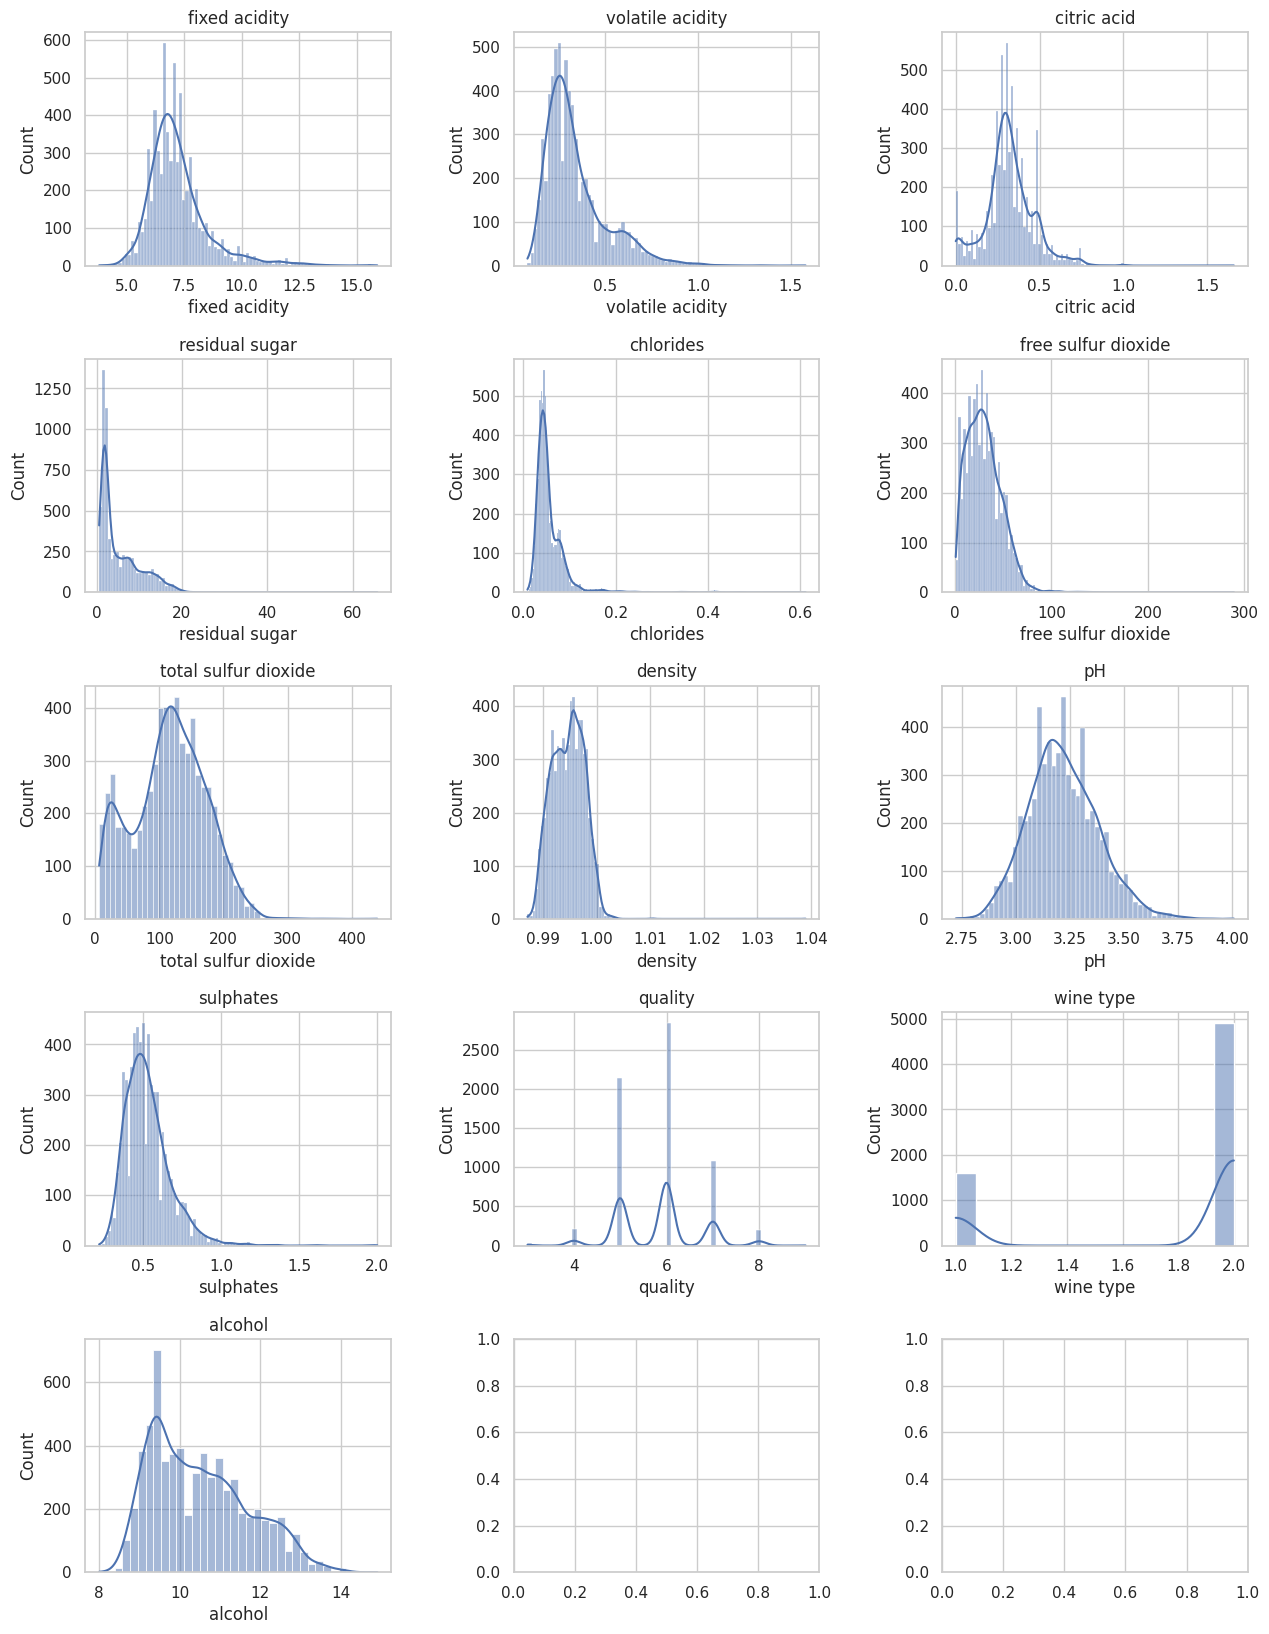

In [ ]:
# Definir el número de filas/columnas para la subparcela
num_vars = len(df.columns)
cols = 3  # Cantidad de columnas en la malla de gráficos
rows = num_vars // cols + (num_vars % cols > 0)

# Crear figura de matplotlib
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Rellenar cada subparcela con un histograma
for i, col in enumerate(df.columns):
    ax = axes[i//cols, i%cols]
    sns.histplot(df[col], kde=True, ax=ax)  # Usamos histplot de seaborn para histograma con KDE
    ax.set_title(col)

# Mostrar el gráfico
plt.show()


## ***Paso 2) Análisis de Atributos y Selección***

En nuestro análisis de correlación para identificar qué variables tienen la mayor relación con la variable objetivo, el porcentaje de alcohol en los vinos, hemos realizado varios pasos clave. Hemos calculado la matriz de correlación y la hemos visualizado utilizando un mapa de calor, y luego hemos extraído y visualizado específicamente las correlaciones de todas las variables con el alcohol.

La matriz de correlación que hemos generado nos ha permitido ver de un vistazo las relaciones entre todas las variables del dataset. Nos hemos centrado en las correlaciones con la variable alcohol, ya que nuestro objetivo es predecir esta variable.

Para una interpretación más clara, hemos creado un gráfico de barras que muestra las correlaciones de Pearson de cada variable con el alcohol. Este gráfico nos ha ayudado a identificar rápidamente qué variables tienen una relación más fuerte con el contenido de alcohol en los vinos.

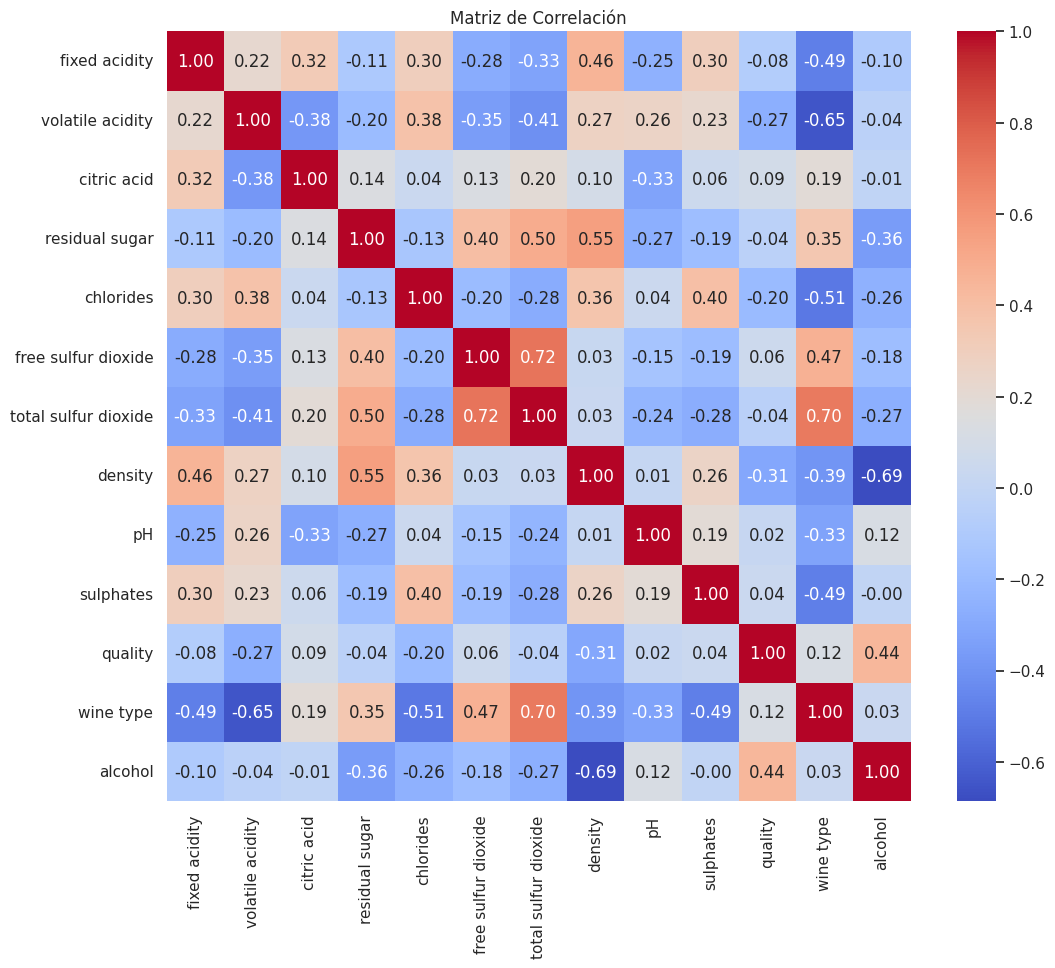

fixed acidity          -0.095452
volatile acidity       -0.037640
citric acid            -0.010493
residual sugar         -0.359415
chlorides              -0.256916
free sulfur dioxide    -0.179838
total sulfur dioxide   -0.265740
density                -0.686745
pH                      0.121248
sulphates              -0.003029
quality                 0.444319
wine type               0.032970
alcohol                 1.000000
Name: alcohol, dtype: float64


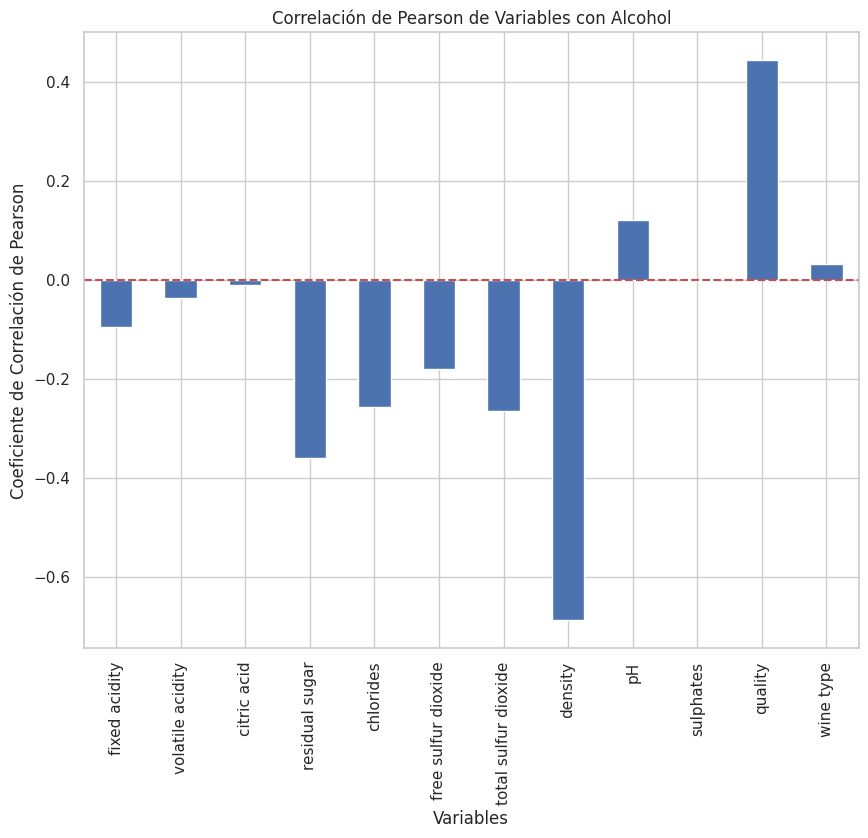

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Extraer la correlación de todas las variables con 'alcohol'
alcohol_correlation = corr_matrix['alcohol']
print(alcohol_correlation)

# Configuración visual
sns.set(style="whitegrid")

# Crear un gráfico de barras para las correlaciones con 'alcohol'
plt.figure(figsize=(10, 8))
alcohol_correlation.drop('alcohol').plot(kind='bar')  # Excluir la correlación de 'alcohol' con sí mismo
plt.title('Correlación de Pearson de Variables con Alcohol')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación de Pearson')
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0 para referencia
plt.show()

Observaciones Clave:

Variables con mayor correlación negativa con alcohol: Hemos observado que variables como density y residual sugar muestran una correlación notablemente negativa con el alcohol. Esto sugiere que a medida que la densidad y el azúcar residual aumentan, el porcentaje de alcohol tiende a disminuir.

Selección de variables para la regresión: Basándonos en estos resultados, podríamos considerar density y quality como variables candidatas para incluir en nuestro modelo de regresión lineal. Estas variables muestran correlaciones significativas, el problema que tenemos con quality es que no es una variable continua y al crear la recta de regresión crea problemas y un error muy grande. Por lo tanto, a parte de density hemos escogido residual sugar.

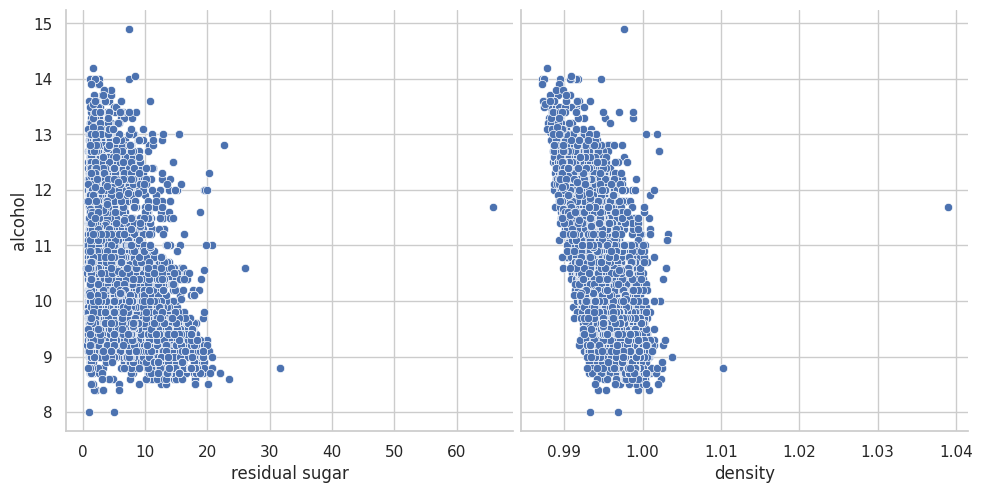

In [ ]:
# Supongamos que las variables 'density' y 'residual sugar' tienen las mayores correlaciones con 'alcohol'
# Crear gráficos de dispersión
sns.pairplot(df, x_vars=['residual sugar', 'density'], y_vars='alcohol', height=5, aspect=1, kind='scatter')
plt.show()


Estos gráficos ayudan a visualizar la relación lineal entre las características seleccionadas y el nivel de alcohol.

Para avanzar en nuestro proyecto, hemos utilizado la técnica de Eliminación Recursiva de Características (RFE) para identificar las variables más significativas que podrían predecir el contenido de alcohol en los vinos. Este método nos ha ayudado a seleccionar automáticamente las características más relevantes basándonos en su contribución a un modelo de regresión lineal.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Aplicar RFE para seleccionar las 3 mejores características
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(scaled_df, df['alcohol'])  # Asegúrate de usar la variable objetivo correcta aquí

# Mostrar los resultados de la selección de características
selected_features = df_numeric.columns[fit.support_]
print("Número de Características Seleccionadas: %s" % fit.n_features_)
print("Características Seleccionadas: %s" % selected_features)


Número de Características Seleccionadas: 3
Características Seleccionadas: Index(['residual sugar', 'density', 'wine type'], dtype='object')


Azúcar Residual ('residual sugar'): Aunque no mostró una correlación fuerte en nuestro análisis inicial, RFE ha identificado esta variable como importante. Esto podría indicar interacciones no lineales o efectos combinados con otras variables que no son evidentes en un análisis de correlación simple.

Densidad ('density'): Su inclusión confirma nuestros análisis previos de correlación donde la densidad mostró una fuerte relación negativa con el alcohol, sugiriendo que a medida que aumenta la densidad, el porcentaje de alcohol tiende a disminuir.

Tipo de Vino ('wine type'): Esta variable categórica también ha sido seleccionada, lo que podría indicar diferencias significativas en los niveles de alcohol entre diferentes tipos de vinos.

## ***Paso 3) Construcción del modelo de regresión lineal simple.***


**1. Preparación de Datos**

Dividimos nuestros datos en conjuntos de entrenamiento y prueba, con un 80% de los datos utilizados para entrenamiento y el 20% restante para pruebas. Esta división es esencial para evaluar la capacidad del modelo para generalizar a nuevos datos.

In [ ]:
# Escogemos 'density' como la variable seleccionada basada en nuestro análisis anterior
X = df[['density']]  # X es la matriz de características (independientes)
y = df['alcohol']  # y es la variable objetivo (dependiente)

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% entrenamiento, 20% prueba


**2. Construcción del Modelo**

Creamos una instancia de LinearRegression, entrenamos el modelo con los datos de entrenamiento, y evaluamos su rendimiento con el conjunto de prueba.

In [ ]:
# Crear una instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

**3. Evaluación del Modelo**

Después de entrenar el modelo, evalúalo usando el conjunto de prueba para ver qué tan bien predice los datos no vistos.

In [ ]:
# Predecir el porcentaje de alcohol en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.7343806232904048
R-squared: 0.4878679434546198


**4. Visualización de los Resultados**

Es útil visualizar la línea de regresión sobre los datos para comprender mejor cómo el modelo está realizando las predicciones.

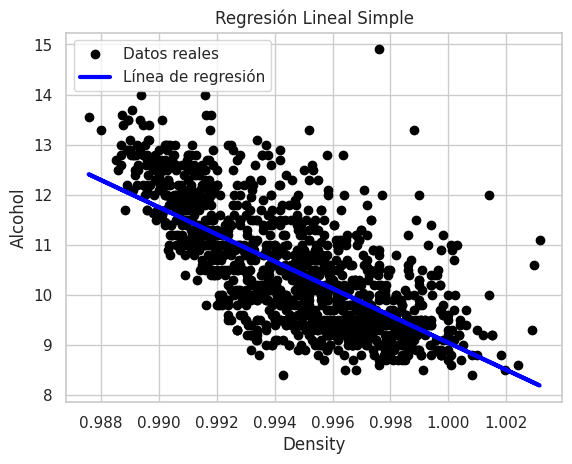

In [ ]:


plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Línea de regresión')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


## Observaciones y conclusiones

Rendimiento del Modelo: El valor de R-cuadrado obtenido es 0.487, lo que sugiere que el modelo puede explicar aproximadamente el 48.7% de la variabilidad en la variable dependiente (alcohol) a partir de la densidad. Aunque es un buen punto de partida, hay espacio para mejorar.

Interpretación del Error Cuadrático Medio

Magnitud del Error: El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrática media entre los valores observados y los valores predichos por el modelo. Un MSE de 0.734 sugiere que, en promedio, el cuadrado de la desviación entre los valores predichos y los reales es de 0.734.

Evaluación de la Calidad del Modelo: Un MSE más bajo indica un mejor ajuste del modelo a los datos. Dado que el MSE está en una escala que depende de la variable dependiente, en este caso el porcentaje de alcohol, es crucial considerar la escala de la variable objetivo para interpretar adecuadamente este valor. En el contexto del porcentaje de alcohol, que típicamente varía de aproximadamente 8% a 15%, un MSE de 0.734 puede ser considerado razonablemente bajo, pero aún hay margen para mejorar.

# EJERCICIO 2 (Regresión	lineal	múltiple)

La empresa productora de vinos cree que es posible construir un modelo de mejor calidad que pueda predecir mejor el grado de alcohol de los futuros vinos si se utilizan varios atributos del dataset. Para ello se solicita la creación de nuevos modelos realizando las siguientes acciones:

1. Crear los diferentes conjuntos de entrenamiento y test para el dataset (0.25 puntos).

2. Construir un modelo de regresión que utilice al menos 4 de los atributos (es posible utilizar más atributos) disponibles en el dataset mediante la utilización de un proceso aprendizaje iterativo. (1.5 puntos).

3. Calcular el error del modelo (0.5 puntos).

4. Evaluar el modelo anterior con el conjunto de test construido anteriormente y explicar el resultado obtenido. (0.25 puntos).

5. Calcular los intervalos de confianza para cada uno de los coeficientes de regresión con un intervalo de confianza del 75% y explica el resultado obtenido (0.5 puntos).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:

data = pd.read_csv('wine_alcohol.csv', sep=';')

In [ ]:
print(data.head())
print(data.describe())

data.isnull().sum()
data.dropna(inplace=True)

   id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  quality  wine type  alcohol  
0       0.56        5          1      9.4  
1       0.68        5          1      9.

In [ ]:
column_names = data.columns.tolist()
print("Nombres de las variables:", column_names)

Nombres de las variables: ['id', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality', 'wine type', 'alcohol']


## Apartado 1)

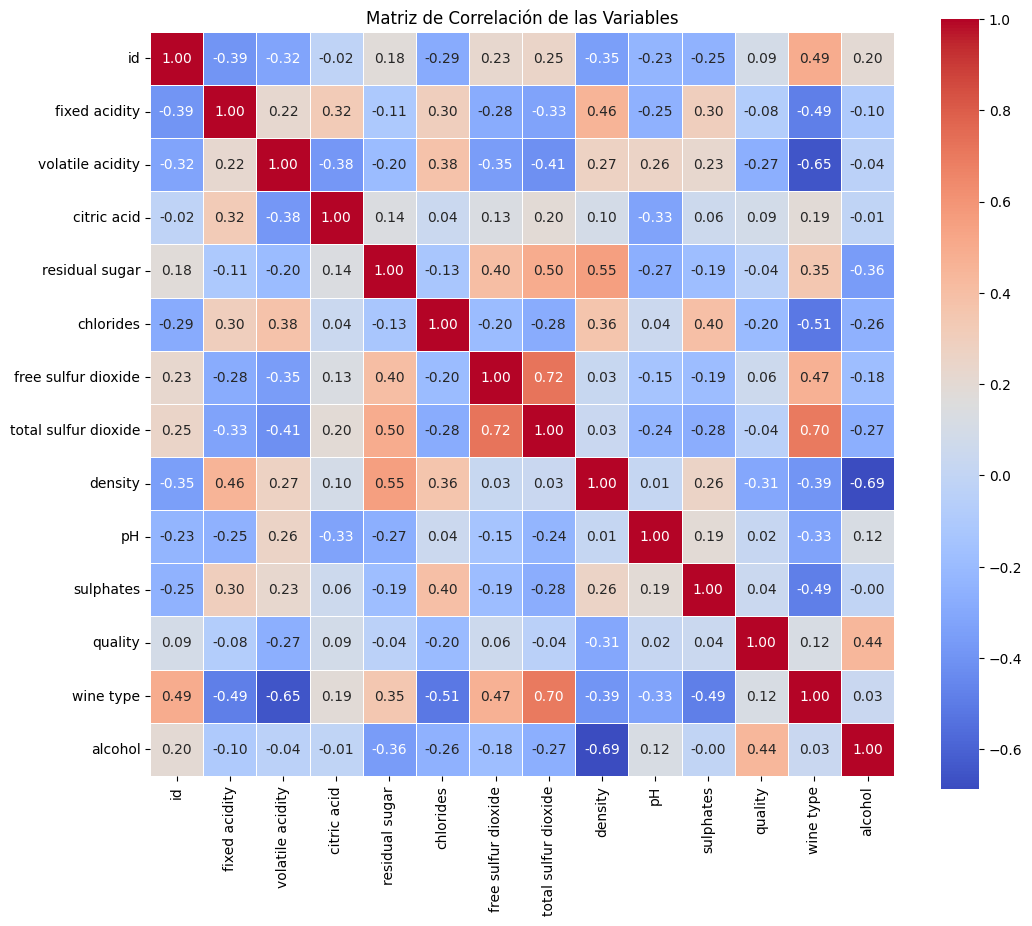

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = data.corr()

# Aumentar el tamaño del gráfico
plt.figure(figsize=(12, 10))  # Puedes ajustar estas dimensiones según tus necesidades

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Matriz de Correlación de las Variables')

# Mostrar el gráfico
plt.show()

In [ ]:
# Seleccionar variables basadas en el análisis de correlación
X = data[['total sulfur dioxide', 'wine type', 'density', 'volatile acidity']]
y = data['alcohol']  # Variable objetivo


A la hora de escoger las variables a usar para el modelo de regresión lineal ha sido necesario fijarse en las correlación de cada una de las variables con la variable objetivo(alcohol)

**Sulfitos totales (-0.27)**: Seleccionamos los sulfitos totales debido a su correlación negativa con el alcohol, que podría reflejar cómo la práctica de adición de sulfitos varía con el estilo de vinificación y el contenido de alcohol.

**Tipo de vino (0.49)**: Esta variable muestra una correlación moderada y positiva con el alcohol. Esta variable no expresa claramente lo que indica sin embargo se supone que se referirá a si el vino es tinto, blanco, rosado...etc.

**Densidad (-0.69)**: La selección de la densidad se basa en su alta correlación negativa con el alcohol. La densidad del vino disminuye a medida que aumenta su contenido alcohólico porque el alcohol tiene una densidad menor que el agua y otros componentes del vino. Este es un indicador físico directo y muy relevante del contenido de alcohol, lo que lo convierte en un predictor crucial.

**Acidez volátil (-0.38)**: La correlación negativa significa que a mayores niveles de alcohol, generalmente observamos menores niveles de acidez volátil.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Apartado 2)

In [ ]:

# Creación y entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Apartado 3)

In [ ]:
# Predicción con el conjunto de prueba y cálculo del error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Error medio del modelo:", mse)

Error medio del modelo: 0.653299298403182


Para saber si el error dado es alto o bajo se deben tener en cuenta diversos factores:

**Escala de la variable objetivo**: Si la variable objetivo, el contenido de alcohol, varía en un rango pequeño, un error de 0.6532 puede considerarse relativamente alto porque sugiere un error sustancial en relación con la escala de los valores que se están prediciendo. Sin embargo, si el rango de variación de alcohol es muy amplio, entonces un error de 0.6532 podría ser considerado más bajo.

**Comparación con la variabilidad de los datos**: Si el rango o la desviación estándar de los datos de alcohol es alto, un MSE de 0.6532 podría ser relativamente bajo. Si los datos de alcohol tienen una desviación estándar de 1 o más, un RMSE de 0.80 representaría un error menor que la variabilidad típica de los datos.



In [ ]:
# Análisis de los resultados
print("Coeficientes del modelo:", model.coef_)

Coeficientes del modelo: [-2.77310708e-03 -4.57128963e-01 -2.94532647e+02  3.61577441e-02]


Como se puede comprobar a la hora de revisar los coeficientes obtenidos, todos afectan de manera muy pequeña al nivel de alcohol del vino, exceptuando el coeficiente obtenido por la tercera variable al ser este muy grande y negativo  indica que un aumento en esta variable predictora tiene un efecto significativamente negativo en el contenido de alcohol. Este valor puede implicar que la variable tiene una fuerte relación inversa con el contenido de alcohol.

## Apartado 4

In [ ]:
X_test_selected = X_test[['total sulfur dioxide', 'wine type', 'density', 'volatile acidity']]
y_pred_test = model.predict(X_test_selected)

# Calcular el MSE para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE for test set: {mse_test}")

MSE for test set: 0.6445299758374774


Como podemos comprobar el error cuadrático medio en los datos de prueba es muy similar que error obtenido en nuestros datos de entrenamiento lo que nos puede dar a entender que hay un buen ajuste y que no hay un sobreajuste en nuestro modelo ya que de ser así este tendría un error considerablemente menor en los datos de entrenamiento que en los datos de prueba.

## Apartado 5)

In [ ]:
residuals = y_test - y_pred
rss = np.sum(residuals**2)
df = len(X_test) - X.shape[1] - 1
mse = rss / df

 Calculamos los residuos, que son las diferencias entre los valores observados (y_test) y los valores predichos (y_pred). Luego calcula la suma de cuadrados de los residuos y los grados de libertad, que se define como el número de observaciones menos el número de parámetros en el modelo. Finalmente, calcula el error cuadrático medio, que es la suma de cuadrados de residuos dividida por los grados de libertad.

In [ ]:
X_train_const = sm.add_constant(X_train)

In [ ]:
var_b = mse * (np.linalg.inv(np.dot(X_train_const.T, X_train_const)).diagonal())
se_b = np.sqrt(var_b)

In [ ]:
t_value = stats.t.ppf(1 - 0.25/2, df)
coefficients = np.concatenate([[model.intercept_], model.coef_])

ci_lower = coefficients - t_value * se_b
ci_upper = coefficients + t_value * se_b

Calculamos la varianza de los coeficientes del modelo utilizando el MSE obtenido y la matriz inversa del producto del diseño transpuesto por sí mismo. Luego, se calcula el error estándar de los coeficientes como la raíz cuadrada de la varianza.

In [ ]:
assert len(ci_lower) == len(coefficients) and len(ci_upper) == len(coefficients)

# Crear un DataFrame con los intervalos de confianza
ci_df = pd.DataFrame({
    'Límite inferior': ci_lower,
    'Límite superior': ci_upper
}, index=['Intercept'] + X.columns.tolist())  # Asegúrate de que el índice tenga la misma longitud que ci_lower y ci_upper

print(ci_df)

                      Límite inferior  Límite superior
Intercept                  299.335769       309.793922
total sulfur dioxide        -0.003139        -0.002407
wine type                   -0.516314        -0.397944
density                   -299.755120      -289.310174
volatile acidity            -0.068560         0.140875


**Intercepto**:

El intervalo es muy estrecho, lo que indica una alta precisión en la estimación del intercepto. Su rango positivo muy elevado nos da a entender que cuando todas las variables predictoras son cero, el contenido de alcohol es significativamente alto.

**Dióxido de azufre total (total sulfur dioxide)**:

Este coeficiente es consistente en negativo y muestra un intervalo muy estrecho, indicando que un aumento en el dióxido de azufre total está asociado de manera confiable con una pequeña disminución en el contenido de alcohol, aunque el efecto es relativamente mínimo

**Tipo de vino (wine type)**:

El intervalo es negativo para ambos límites, sugiriendo que hay una diferencia significativa en el contenido de alcohol entre los tipos de vino (probablemente entre vinos blancos y tintosy demás), con un tipo de vino teniendo sistemáticamente menos alcohol que el otro.

**Densidad (density)**:

Este coeficiente muestra un intervalo de confianza muy amplio pero consistentemente negativo, indicando que la densidad tiene un fuerte efecto negativo sobre el contenido de alcohol. Cuanto mayor es la densidad, menor es el contenido de alcohol.

**Acidez volátil (volatile acidity):**

Este es el único intervalo que cruza cero, lo que indica incertidumbre sobre la dirección del efecto de la acidez volátil en el contenido de alcohol. Esto podría significar que la relación no es lineal o que hay otros factores que afectan esta relación.

# EJERCICIO 3 (agrupamiento)

La empresa productora de vinos no está segura de que la empresa de analiza la calidad de los diferentes vinos esté realizando el trabajo adecuadamente por lo que ha decidido analizar si los diferentes vinos que han sido producidos en los últimos años realmente tienen la calidad identificada. Para ello se debe aplicar un algoritmo de agrupamiento para comprobar si los vinos realmente se agrupan de manera similar a como han sido valorados por la empresa evaluadora (quality) y realizar las siguientes acciones:

1. Realizar todo el proceso de preparación, limpieza, eliminación y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de agrupamiento (0.5 puntos).

2. Ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cuál es el valor de k que mejores resultados ofrece (1 punto). Es necesario justificar la selección del mejor valor de k mediante la utilización de datos empíricos.

3. Analizar los clústeres obtenidos para el mejor valor de k y responder a las siguientes preguntas:
   - ¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del dataset? (0.5 puntos).
   - ¿Cómo se diferencian los clústeres entre sí? (0.5 puntos).

Es necesario justificar las respuestas mediante la utilización de datos empíricos.


## 3.1
 Realizar todo el proceso de preparación, limpieza, eliminación y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de agrupamiento (0.5 puntos).

In [ ]:
# Cargando los datos desde el archivo CSV
data = pd.read_csv('wine_alcohol.csv', delimiter=';')

# Mostrando las primeras filas del dataframe para entender la estructura de los datos
print(data.head())

   id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  quality  wine type  alcohol  
0       0.56        5          1      9.4  
1       0.68        5          1      9.

Con esta información podemos describir las variables que nos darán información relevante y pistas sobre las relaciones interesantes a estudiar del dataset:

1. **Fixed Acidity (Acidez Fija):** Se refiere a la cantidad total de ácidos fijos en el vino, principalmente ácido tartárico. Este atributo podría influir en la percepción de la acidez del vino y su sabor general.

2. **Volatile Acidity (Acidez Volátil):** Indica la cantidad de ácidos volátiles en el vino, principalmente ácido acético. Una alta concentración de este ácido puede dar lugar a sabores avinagrados no deseados en el vino.

3. **Citric Acid (Ácido Cítrico):** Representa la cantidad de ácido cítrico en el vino. Este ácido puede agregar frescura y vitalidad al vino, y su presencia puede influir en su sabor y equilibrio.

4. **Residual Sugar (Azúcar Residual):** Es la cantidad de azúcar que queda en el vino después de la fermentación. El nivel de azúcar residual puede afectar al sabor del vino, haciéndolo más dulce o seco, y también puede influir en su cuerpo y textura.

5. **Chlorides (Cloruros):** Indica la concentración de cloruros en el vino. Altos niveles de cloruros pueden ser indicativos de contaminación o presencia de salinidad en el suelo donde se cultivaron las uvas.

6. **Free Sulfur Dioxide (Dióxido de Azufre Libre):** Es la cantidad de dióxido de azufre presente en forma libre en el vino. El dióxido de azufre tiene propiedades antioxidantes y antimicrobianas, y su presencia puede afectar la estabilidad y calidad del vino.

7. **Total Sulfur Dioxide (Dióxido de Azufre Total):** Representa la cantidad total de dióxido de azufre, incluyendo tanto la forma libre como la combinada. Altos niveles de dióxido de azufre pueden ser necesarios para prevenir la oxidación y el crecimiento microbiano, pero también pueden afectar al aroma y sabor del vino si están presentes en exceso.

8. **Density (Densidad):** Es la densidad del vino y está relacionada con su contenido de azúcar y alcohol. La densidad puede influir en la sensación en boca y la textura del vino.

9. **pH:** Indica el nivel de acidez o alcalinidad del vino. El pH puede afectar la estabilidad microbiológica del vino y su capacidad de conservación, así como su sabor y equilibrio general.

10. **Sulphates (Sulfatos):** Representa la cantidad de sulfatos presentes en el vino. Los sulfatos pueden actuar como antioxidantes y conservantes, pero su presencia en exceso también puede contribuir a sabores no deseados, como el carácter sulfuroso.

11. **Alcohol:** Es el porcentaje de alcohol por volumen en el vino. El contenido de alcohol puede influir en la percepción del cuerpo, la calidez y el equilibrio del vino.

12. **Quality (Calidad):** Es la variable objetivo que indica la calidad del vino, valorada en una escala discreta. La calidad del vino puede ser influenciada por una combinación de los atributos mencionados anteriormente, así como por otros factores como la variedad de uva, el proceso de vinificación y el tiempo de envejecimiento.

Entendiendo ahora un poco mejor las variables, podemos proceder con la limpieza, eliminación y análisis de los datos.

1. Eliminación de columnas irrelevantes: La columna 'id' no parece ser relevante para nuestro análisis, así que la eliminaremos.

2. Manejo de valores faltantes: Verificaremos si hay valores faltantes en el conjunto de datos y decidiremos cómo manejarlos.

3. Exploración de variables: Realizaremos algunas exploraciones iniciales para comprender la distribución y la relación entre las variables.

4. Identificación de variables candidatas: Basándonos en nuestras exploraciones, identificaremos las variables que podrían ser candidatas para el proceso de agrupamiento.

In [ ]:
# También podríamos visualizar algunas distribuciones para entender mejor las variables

# 1. Eliminación de la columna 'id'
data = data.drop(columns=['id'])

# 2. Verificación de valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

# 3. Exploración de variables
data_description = data.describe()
print("\nDescripción de las variables:\n", data_description)




Valores faltantes por columna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64

Descripción de las variables:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900



* Acidez fija (Fixed Acidity) : Con una media de 8.319637 y una mediana de 7.900000, y considerando que el valor máximo es considerablemente más alto que el cuartil 75%, se podría inferir la presencia de valores atípicos y se sugiere que la distribución puede estar sesgada hacia la derecha.
* Acidez Volátil (Volatile Acidity): La media y la mediana están bastante próximas entre sí, pero el valor máximo es significativamente mayor que el cuartil 75%, lo que indica la posible presencia de valores atípicos y una distribución sesgada hacia la derecha

* Azúcar Residual (Residual Sugar): La media es notablemente superior a la mediana, y el valor máximo es extremadamente alto comparado con el cuartil 75%, lo que indica una asimetría positiva muy marcada.
*  Dióxido de Azufre Libre (Free Sulfur Dioxide) y Dióxido de Azufre Total (Total Sulfur Dioxide): Ambas variables muestran una diferencia significativa entre la media y el valor máximo, sugiriendo la presencia de valores atípicos y una distribución sesgada hacia la derecha.

Para ver esto de forma mas visual vamos a calcular el diagrama de bigotes "boxplot" de cada variable y podemos ver como estan distribuidos los datos de forma mucho mas sencilla. Además, estudiaremos la asimetría de Pearson para ver de que forma están distribuidos nuestros datos.



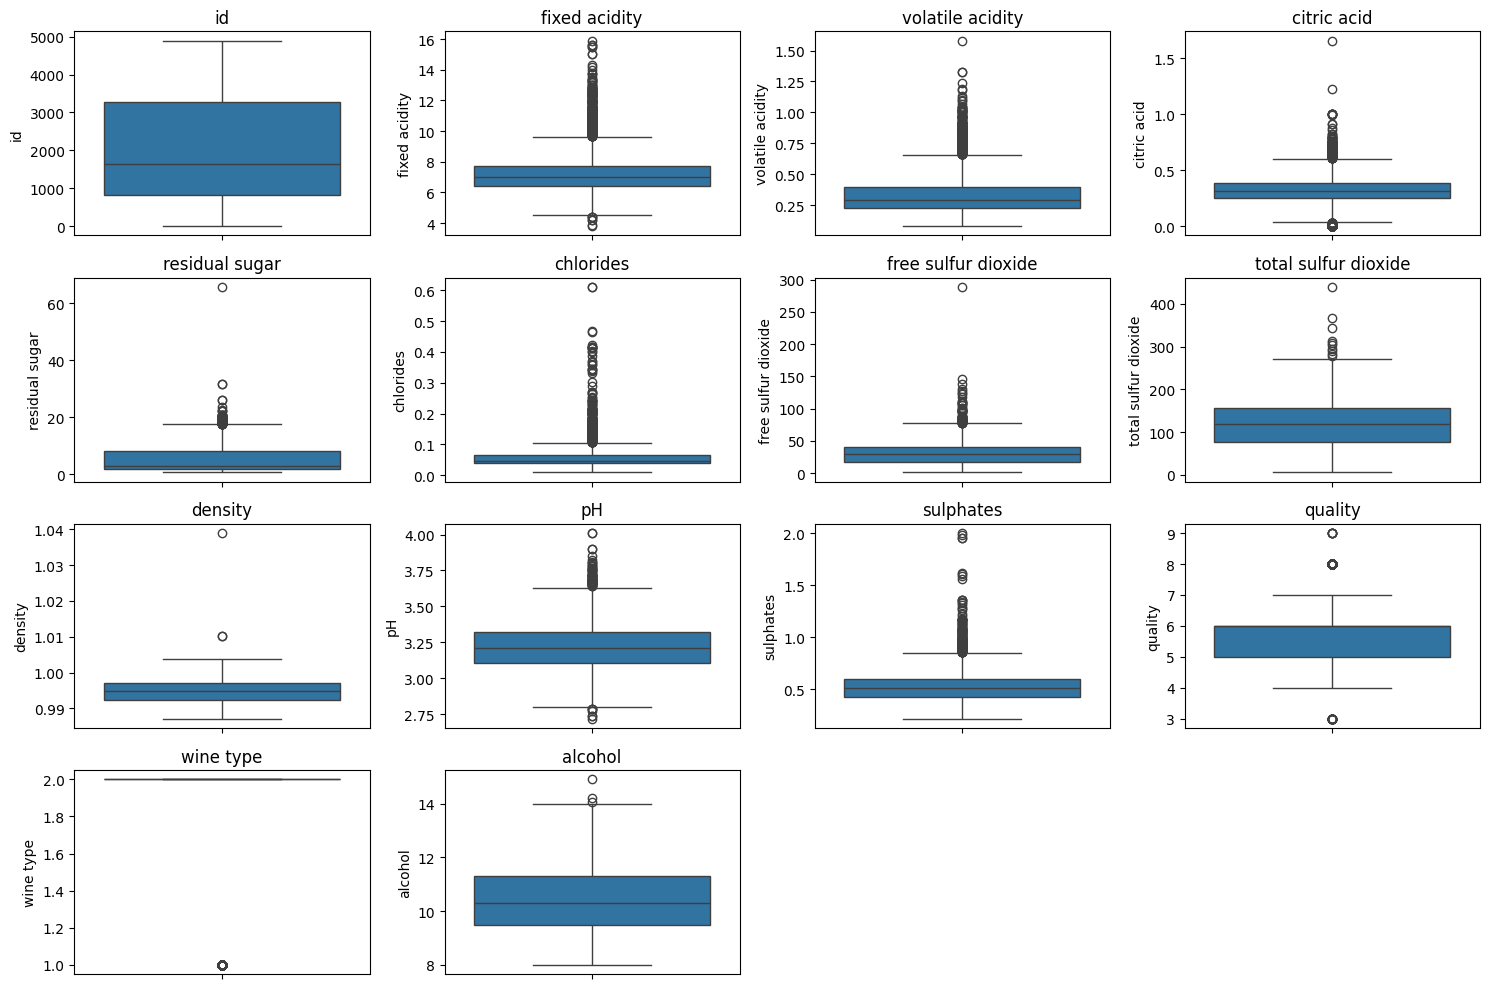

Coeficiente de Asimetría de Pearson:
id                      0.410419
fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
quality                 0.189623
wine type              -1.179095
alcohol                 0.565718
dtype: float64


In [ ]:
# Cargar los datos
data = pd.read_csv('wine_alcohol.csv', delimiter=';')

# Crear boxplots para cada variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Calcular y mostrar el coeficiente de asimetría de Pearson para cada variable
print("Coeficiente de Asimetría de Pearson:")
asymmetry_coefficients = data.skew()
print(asymmetry_coefficients)


**Interpretación de los boxplot**


* Acidez fija (fixed acity):  Los datos muestran una mediana cercana a 8 g/dm³, con una dispersión moderada alrededor de la mediana (intercuartil de aproximadamente 6.5 a 9.5 g/dm³).Los valores atípicos se presentan por encima de aproximadamente 12.5 g/dm³. Estos valores pueden indicar vinos con características excepcionales de acidez
* Acidez volatil: La mediana está cerca de 0.5 g/dm³. Los datos están concentrados, con un rango intercuartil de aproximadamente 0.4 a 0.6 g/dm³. Los valores atípicos están principalmente por encima de 0.8 g/dm³. Estos puntos sugieren variantes de vino que podrían tener problemas de calidad o características distintivas debido a la volatilidad de la acidez.

*  ácido cítrico: La mediana se sitúa cerca de 0.25 g/dm³, con un rango intercuartil desde cerca de 0.1 hasta 0.4 g/dm³. Los pocos valores atípicos por encima de 0.6 g/dm³. Estos podrían indicar vinos con una intervención significativa en su proceso de acidificación o características naturales poco comunes.
*Tipo de vino: Al ser una variable categórica binomial(0-blanco, 1-tinto) No hay valores atípicos evidentes aquí, lo cual es esperado en una variable categórica con datos claramente definidos en categorías específicas.


* Alcohol:La mediana del contenido de alcohol es de aproximadamente 10% vol., con un rango intercuartil desde cerca de 9.5% hasta 11% vol que indica en que rangos de %de alcohol estan las bebidas de este conjunto de datos. Los valores atípicos por encima de 12.5% vol. son notables y podrían representar vinos de alta graduación, lo que puede ser deseable dependiendo del tipo de vino.



**Análisis de los coeficientes de asimetría de Pearson**

* id (0.414019): Muestra una ligera asimetría positiva. Esto podría indicar una
concentración de valores más altos.  
*   Fixed Acidity (1.723292): Asimetría positiva significativa, sugiriendo una cola derecha pronunciada en los datos de acidez fija.

*  Volatile Acidity (1.495797): También presenta asimetría positiva, lo que indica una cola derecha en los valores de acidez volátil.
*   Citric acid (0.47) : Ligeramente asimétrico hacia la derecha, aunque más cercano a una distribución simétrica.
*   Residual Sugar (1.435484): Asimetría positiva, indicando que los valores más altos de azúcar residual se extienden más allá de la mayoría de los datos.
*   Chlorides (5.399828): Asimetría muy alta, lo que sugiere una presencia considerable de valores extremos.

*   Free Sulfur Dioxide (-0.220166): Ligeramente asimétrico hacia la izquierda, aunque está cerca de ser simétrico.
*   Total Sulfur Dioxide (0.581377): Una asimetría positiva leve, indicando una cola más larga hacia los valores superiores.
*   pH (0.386839): Asimetría positiva ligera, pero aún relativamente simétrica.
*   Sulphates (1.797270): Asimetría positiva notable, lo que sugiere una cola derecha extensa
*   Quality (0.189263): Muy cerca de la simetría, con una leve inclinación hacia la derecha.
*   Wine Type (-1.176935): Asimetría negativa, que es inusual para una variable categórica y podría indicar un desequilibrio en la distribución de los tipos de vino.
*   Alcohol (0.565718): Presenta una asimetría positiva leve, lo que sugiere que hay más vinos con mayor contenido de alcohol que el promedio general.






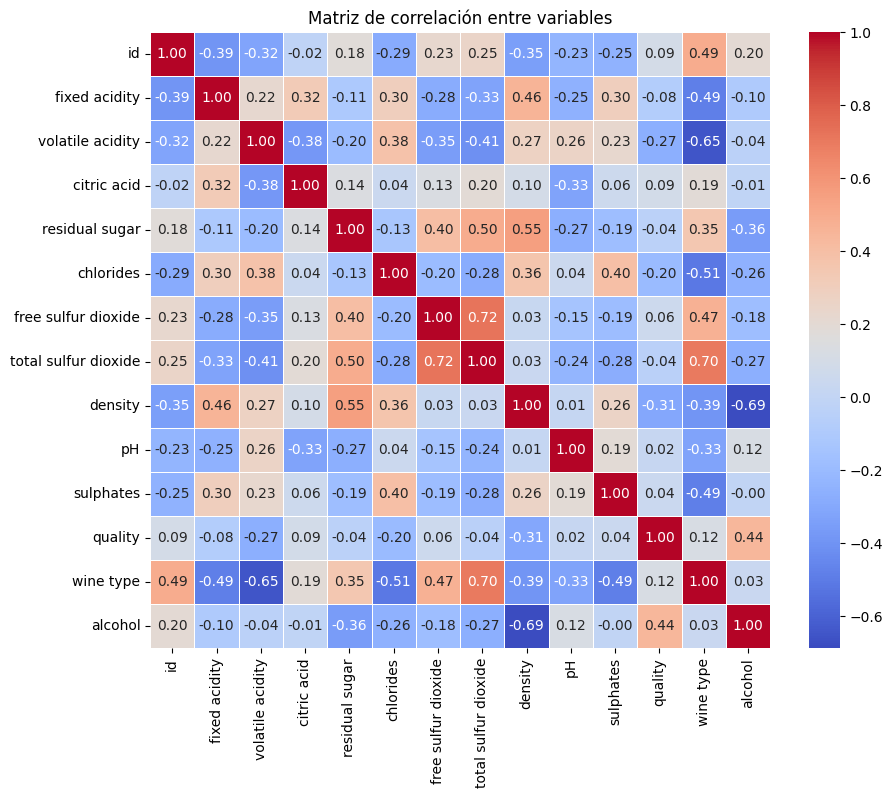

In [ ]:
# 4. Identificación de variables candidatas
# Vamos a calcular la matriz de correlación para entender la relación entre las variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables')
plt.show()




**Correlaciones Más Altas**



*   Dióxido de azufre libre y Dióxido de azufre total (0.72):Es lógico que estas dos variables estén fuertemente correlacionadas, ya que el dióxido de azufre libre forma parte del total de dióxido de azufre en el vino.
*   Densidad y Alcohol (-0.69): Exhiben una fuerte correlación negativa. A medida que el contenido de alcohol aumenta, la densidad del vino generalmente disminuye debido a la menor densidad del alcohol en comparación con el agua.


*   Volatile Acidity y Wine Type (0.47): Muestra que hay una relación moderada, donde cierto tipo de vino podría caracterizarse por tener niveles más altos de acidez volátil.


**Correlaciones Más Bajas**



*   Citric Acid y Fixed Acidity (0.11): A pesar de ser ambas medidas de acidez,tienen una correlación muy baja, lo que sugiere que los factores que afectan la acidez fija no influyen significativamente en los niveles de ácido cítrico, o viceversa.
*   pH y Free Sulfur Dioxide (0.04): Casi no tienen correlación, indicando que el pH del vino no está directamente relacionado con la cantidad de dióxido de azufre libre.


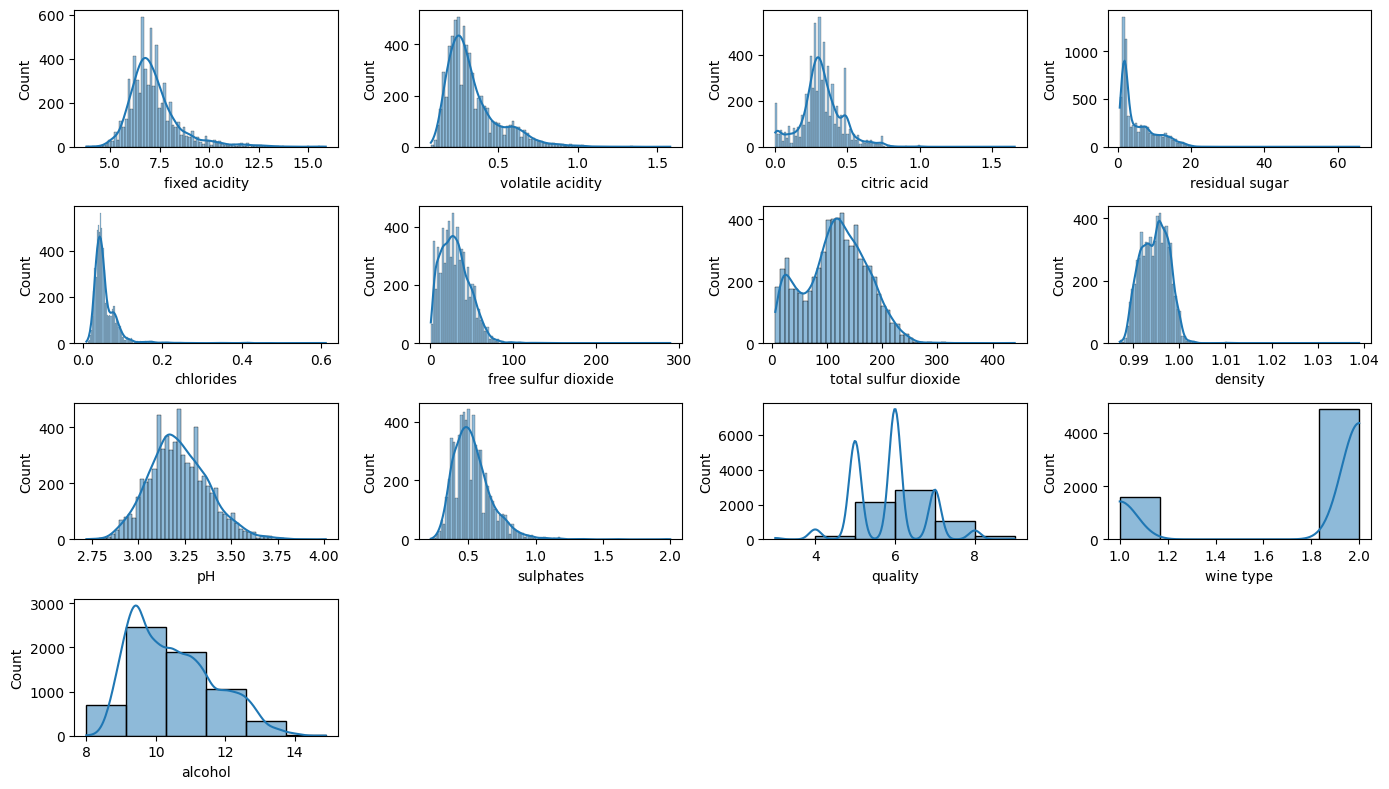

In [ ]:
# DISTRIBUCIONES DE LAS VARIABLES
plt.figure(figsize=(14, 8))

# Distribución de 'fixed acidity'
plt.subplot(4, 4, 1)
sns.histplot(data['fixed acidity'], kde=True)

# Distribución de 'volatile acidity'
plt.subplot(4, 4, 2)
sns.histplot(data['volatile acidity'], kde=True)

# Distribución de 'citric acid'
plt.subplot(4, 4, 3)
sns.histplot(data['citric acid'], kde=True)

# Distribución de 'residual sugar'
plt.subplot(4, 4, 4)
sns.histplot(data['residual sugar'], kde=True)

# Distribución de 'chlorides'
plt.subplot(4, 4, 5)
sns.histplot(data['chlorides'], kde=True)

# Distribución de 'free sulfur dioxide'
plt.subplot(4, 4, 6)
sns.histplot(data['free sulfur dioxide'], kde=True)

# Distribución de 'total sulfur dioxide'
plt.subplot(4, 4, 7)
sns.histplot(data['total sulfur dioxide'], kde=True)

# Distribución de 'density'
plt.subplot(4, 4, 8)
sns.histplot(data['density'], kde=True)

# Distribución de 'pH'
plt.subplot(4, 4, 9)
sns.histplot(data['pH'], kde=True)

# Distribución de 'sulphates'
plt.subplot(4, 4, 10)
sns.histplot(data['sulphates'], kde=True)

# Distribución de 'quality'
plt.subplot(4, 4, 11)
sns.histplot(data['quality'], bins=6, kde=True)

# Distribución de 'wine type'
plt.subplot(4, 4, 12)
sns.histplot(data['wine type'], bins=6, kde=True)

# Distribución de 'alcohol'
plt.subplot(4, 4, 13)
sns.histplot(data['alcohol'], bins=6, kde=True)

plt.tight_layout()
plt.show()

A partir de los histogramas vamos a caracterizar cada variable:



*   Distribuciones gamma : Fixed Acidity, Volatile Acidity , Citric Acid , Free Sulfur Dioxide , Total Sulfur , Sulphates
*   Distribución normal : Density , Ph (aunque sesgada a la izquierda)


*   Discreta : Quality (istribución con varias categorías discretas.) y wine type categorica binomial (blanco y tinto)





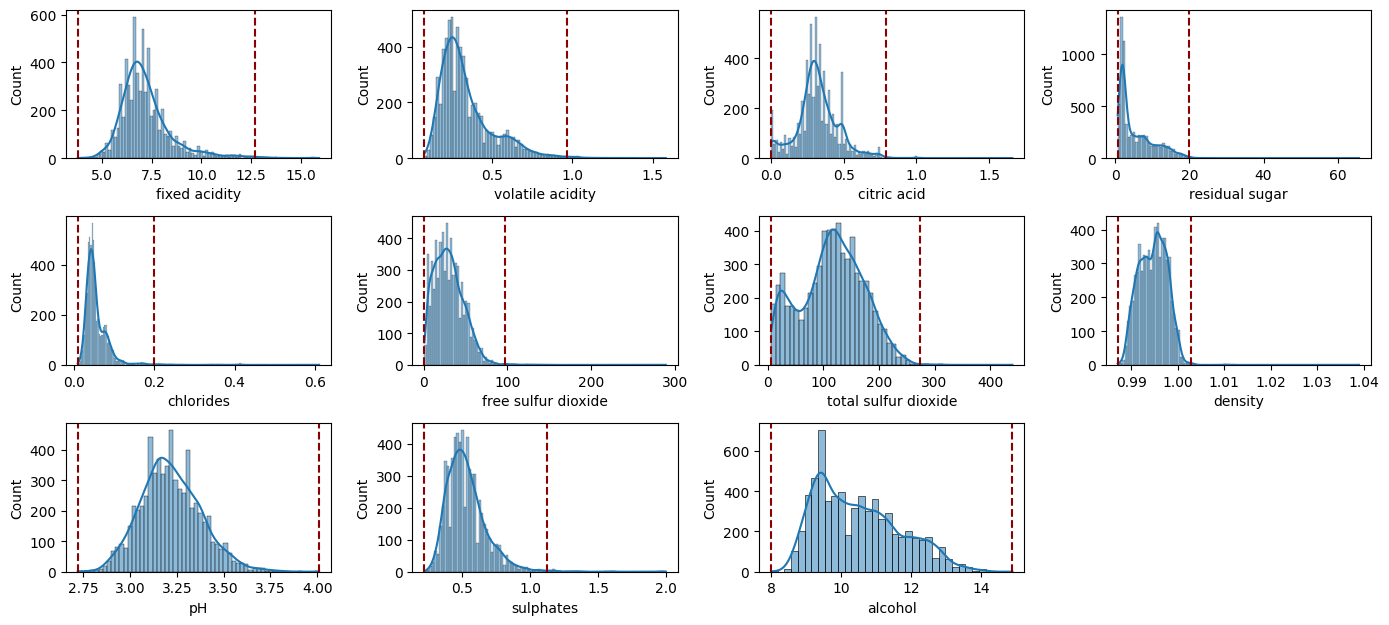

In [ ]:
plt.figure(figsize=(14, 8))

# Distribución de 'fixed acidity'
plt.subplot(4, 4, 1)
sns.histplot(data['fixed acidity'], kde=True)
plt.axvline(x=data['fixed acidity'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['fixed acidity'].quantile(0.995), color='darkred', linestyle='--')

# Distribución de 'volatile acidity'
plt.subplot(4, 4, 2)
sns.histplot(data['volatile acidity'], kde=True)
plt.axvline(x=data['volatile acidity'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['volatile acidity'].quantile(0.995), color='darkred', linestyle='--')

# Distribución de 'citric acid'
plt.subplot(4, 4, 3)
sns.histplot(data['citric acid'], kde=True)
plt.axvline(x=data['citric acid'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['citric acid'].quantile(0.997), color='darkred', linestyle='--')

# Distribución de 'residual sugar'
plt.subplot(4, 4, 4)
sns.histplot(data['residual sugar'], kde=True)
plt.axvline(x=data['residual sugar'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['residual sugar'].quantile(0.997), color='darkred', linestyle='--')

# Distribución de 'chlorides'
plt.subplot(4, 4, 5)
sns.histplot(data['chlorides'], kde=True)
plt.axvline(x=data['chlorides'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['chlorides'].quantile(0.991), color='darkred', linestyle='--')

# Distribución de 'free sulfur dioxide'
plt.subplot(4, 4, 6)
sns.histplot(data['free sulfur dioxide'], kde=True)
plt.axvline(x=data['free sulfur dioxide'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['free sulfur dioxide'].quantile(0.997), color='darkred', linestyle='--')

# Distribución de 'total sulfur dioxide'
plt.subplot(4, 4, 7)
sns.histplot(data['total sulfur dioxide'], kde=True)
plt.axvline(x=data['total sulfur dioxide'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['total sulfur dioxide'].quantile(0.9985), color='darkred', linestyle='--')

# Distribución de 'density'
plt.subplot(4, 4, 8)
sns.histplot(data['density'], kde=True)
plt.axvline(x=data['density'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['density'].quantile(0.9985), color='darkred', linestyle='--')

# Distribución de 'pH'
plt.subplot(4, 4, 9)
sns.histplot(data['pH'], kde=True)
plt.axvline(x=data['pH'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['pH'].quantile(1), color='darkred', linestyle='--')

# Distribución de 'sulphates'
plt.subplot(4, 4, 10)
sns.histplot(data['sulphates'], kde=True)
plt.axvline(x=data['sulphates'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['sulphates'].quantile(0.995), color='darkred', linestyle='--')

# Distribución de 'alcohol'
plt.subplot(4, 4, 11)
sns.histplot(data['alcohol'], kde=True)
plt.axvline(x=data['alcohol'].quantile(0), color='darkred', linestyle='--')
plt.axvline(x=data['alcohol'].quantile(1), color='darkred', linestyle='--')


plt.tight_layout()
plt.show()

**Análisis de las distribuciones:**
Las líneas rojas demarcan claramente los límites dentro de los cuales se consideran "normales" la mayoría de los datos, y cualquier valor que se encuentre fuera de estas líneas puede ser considerado un valor atípico. Estos análisis son fundamentales para cualquier procedimiento de limpieza de datos o para tomar decisiones analíticas en las cuales la presencia de valores atípicos pueda tener una influencia significativa en los resultados. La visualización mediante histogramas con líneas de cuantiles provee una herramienta poderosa para comprender la distribución de los datos y facilita la toma de decisiones sobre cómo manejar los valores atípicos en análisis posteriores.

Por ejemplo para la variable "Fixed Acidity" como comentamos en el estudio de las distribuciones vemos que los datos están entre los valores 5<x<12,5 todo valor que este fuera de ese intervalo se conoce coomo outlier y en este caso , podría indicar una cola a la derecha es decir datos asimetricos positivos y en este conjunto de datos podría indicar vino con un grado excepcional de acidez o mas ácido de lo normal

In [ ]:
# Eliminación de outliers para cada variable
dt34 = data.copy()

# Para 'fixed acidity'
dt34 = dt34[(dt34['fixed acidity'] >= dt34['fixed acidity'].quantile(0)) &
                                    (dt34['fixed acidity'] <= dt34['fixed acidity'].quantile(0.995))]

# Para 'volatile acidity'
dt34 = dt34[(dt34['volatile acidity'] >= dt34['volatile acidity'].quantile(0)) &
                                    (dt34['volatile acidity'] <= dt34['volatile acidity'].quantile(0.995))]

# Para 'citric acid'
dt34 = dt34[(dt34['citric acid'] >= dt34['citric acid'].quantile(0)) &
                                    (dt34['citric acid'] <= dt34['citric acid'].quantile(0.997))]

# Para 'residual sugar'
dt34 = dt34[(dt34['residual sugar'] >= dt34['residual sugar'].quantile(0)) &
                                    (dt34['residual sugar'] <= dt34['residual sugar'].quantile(0.997))]

# Para 'chlorides'
dt34 = dt34[(dt34['chlorides'] >= dt34['chlorides'].quantile(0)) &
                                    (dt34['chlorides'] <= dt34['chlorides'].quantile(0.991))]

# Para 'free sulfur dioxide'
dt34 = dt34[(dt34['free sulfur dioxide'] >= dt34['free sulfur dioxide'].quantile(0)) &
                                    (dt34['free sulfur dioxide'] <= dt34['free sulfur dioxide'].quantile(0.997))]

# Para 'total sulfur dioxide'
dt34 = dt34[(dt34['total sulfur dioxide'] >= dt34['total sulfur dioxide'].quantile(0)) &
                                    (dt34['total sulfur dioxide'] <= dt34['total sulfur dioxide'].quantile(0.9985))]

# Para 'density'
dt34 = dt34[(dt34['density'] >= dt34['density'].quantile(0)) &
                                    (dt34['density'] <= dt34['density'].quantile(0.9985))]

# Para 'pH' no se eliminan outliers

# Para 'sulphates'
dt34 = dt34[(dt34['sulphates'] >= dt34['sulphates'].quantile(0)) &
                                    (dt34['sulphates'] <= dt34['sulphates'].quantile(0.995))]

# Para 'alcohol' no se eliminan outliers

# Verifica la forma del nuevo DataFrame después de eliminar outliers
print("Forma del DataFrame sin outliers:", dt34.shape)

Forma del DataFrame sin outliers: (6269, 14)


Al observar esta información y sabiendo como puede afectar cada variable al resultado de la calidad del vino, llegamos a la conclusión de usar las siguientes variables para hacer el clústering:

1. **Fixed Acidity (Acidez Fija)**

2. **Volatile Acidity (Acidez Volátil)**

3. **Citric Acid (Ácido Cítrico)**

4. **Residual Sugar (Azúcar Residual)**

5. **Chlorides (Cloruros)**

6. **Free Sulfur Dioxide (Dióxido de Azufre Libre)**

7. **Total Sulfur Dioxide (Dióxido de Azufre Total)**

8. **Density (Densidad)**

9. **pH**

10. **Sulphates (Sulfatos)**

11. **Alcohol**

## 3.2.
**Ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cual es el
valor de k que mejor resultados ofrece (1 punto). En necesario justificar la selección del mejor valor
de k mediante la utilización de datos empíricos.**

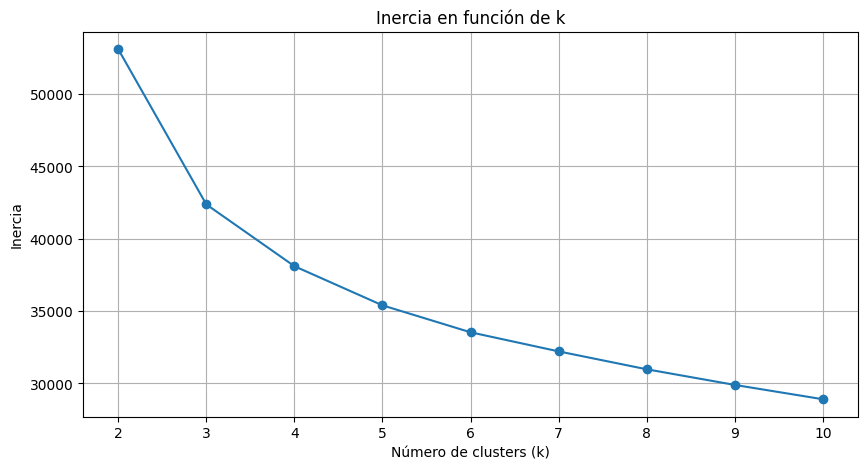

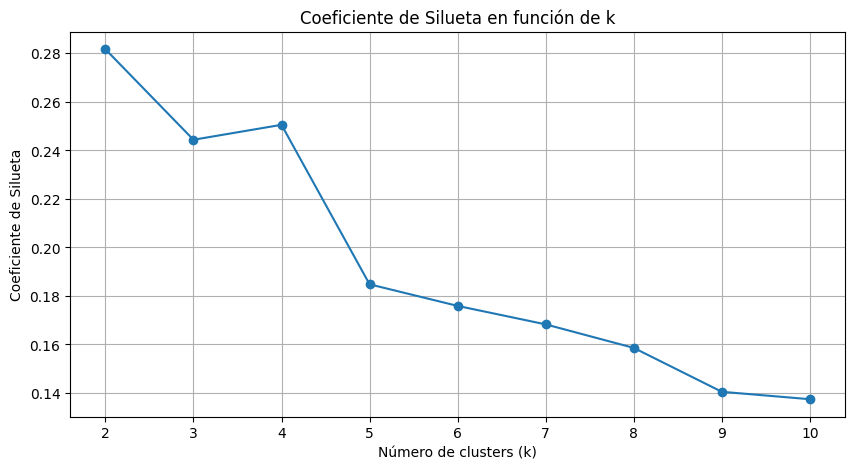

In [ ]:
# Seleccionar las columnas relevantes
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol']
data_selected = dt34[selected_columns]

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Probar diferentes valores de k y evaluar la calidad de los agrupamientos
k_values = range(2, 11)  # Probaremos desde 2 hasta 10 clusters
inertia_values = []  # Lista para almacenar la inercia de cada modelo
silhouette_scores = []  # Lista para almacenar el coeficiente de silueta de cada modelo

# Suprimir el warning
warnings.filterwarnings("ignore", category=FutureWarning)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Establecer n_init explícitamente
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

warnings.filterwarnings("default", category=FutureWarning)

# Graficar la inercia en función de k
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Inercia en función de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Graficar el coeficiente de silueta en función de k
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta en función de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(k_values)
plt.grid(True)
plt.show()

La inercia mide la suma de las distancias cuadradas de cada punto al centroide de su cluster. Menor inercia indica clusters más compactos. En la primera gráfica (Inercia en función de k), se observa que:


1.   La inercia disminuye a medida que k aumenta, lo que indica que se forman clusters más compactos.
2.   La curva presenta una clara disminución inicial y luego se estabiliza.
3. El punto de inflexión, conocido como el "Codo", es donde el beneficio de añadir más clusters comienza a reducirse. En esta gráfica, el codo parece estar en k = 4. En estadística lo hemos dado como "Scree Plot"



El coeficiente de silueta evalúa qué tan bien están separados los clusters:

Matemáticamente, S = b-a / max(a,b) . Donde a es la distancia promedio entre un punto y todos los demás puntos de su propio cluster y b es la distancia promedio al cluster mas cercano. S va a ir entre {-1,1} es decir , -1<S<1.

Viendo la segunda gráfica podemos observar:



*   El coeficiente de silueta es más alto para k = 2 (alrededor de 0.28).
A medida que k aumenta, el coeficiente de silueta disminuye.
Esto sugiere que k = 2 podría ser el valor óptimo en términos de la calidad del clustering.

**CONCLUSIÓN**

Inercia: Según la gráfica de inercia, el codo ocurre en k = 4.
Coeficiente de Silueta: La máxima calidad de clusters según el coeficiente de silueta se alcanza con k = 2.







**Vamos a fusionar PCA CON CLUSTER**

PCA (Análisis de las componentes principales ) se utiliza para reducir el número de dimensiones en los datos, reteniendo la máxima variabilidad posible Una vez que se reduce la dimensionalidad, K-Means se aplica sobre los datos transformados. Esto puede hacer que los clusters sean más distinguibles y el algoritmo sea más eficiente.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


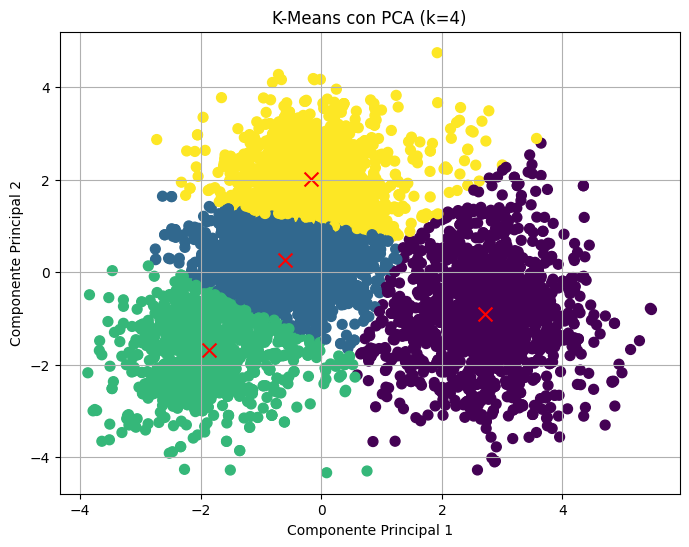

In [ ]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicar K-Means sobre los datos transformados
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-Means con PCA (k=4)')
plt.grid(True)
plt.show()


La gráfica muestra cuatro clusters distintos, cada uno representado por un color diferente (verde, amarillo, morado, azul). Los centroides de cada cluster están marcados con una cruz roja ('x'). Estos puntos representan el centro geométrico de los puntos en cada cluster, en el espacio transformado.

Los clusters parecen estar bien definidos y mayormente separados, aunque hay algunas áreas donde los clusters amarillo y morado muestran una ligera superposición.

Aunque la gráfica no especifica qué características originales contribuyen más a cada componente principal, generalmente, el primer componente captura la mayor variabilidad y el segundo captura la mayor parte de la variabilidad restante no capturada por el primer componente.


In [ ]:
# Utilizar K-Means con k=4
k_optimo = 4
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans_optimo.fit(data_scaled)

# Agregar las etiquetas de los clusters al dataframe original
dt34['cluster'] = kmeans_optimo.labels_

# Analizar los resultados
cluster_centers = scaler.inverse_transform(kmeans_optimo.cluster_centers_)  # Centroides en la escala original

# Visualizar los centroides de los clusters
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_columns)
print("Centroides de los clusters:")
print(cluster_centers_df)

# Conteo de muestras en cada cluster
cluster_counts = dt34['cluster'].value_counts().sort_index()
print("\nNúmero de muestras en cada cluster:")
print(cluster_counts)

# Análisis de las características de cada cluster
for i in range(k_optimo):
    print(f"\nCaracterísticas del cluster {i}:")
    cluster_data = dt34[dt34['cluster'] == i][selected_columns]
    cluster_description = cluster_data.describe()
    print(cluster_description)



Centroides de los clusters:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       9.429984          0.394364     0.449199        2.636892   0.083736   
1       6.760024          0.268280     0.320549        3.361119   0.039707   
2       7.259683          0.597868     0.132603        2.500847   0.078741   
3       6.959093          0.278950     0.353593       11.143035   0.050685   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            15.271586             48.015699  0.997033  3.223077   0.687802   
1            29.254517            118.497220  0.992072  3.208954   0.485827   
2            17.038095             54.232804  0.996083  3.371714   0.592487   
3            44.581813            168.393035  0.996936  3.159326   0.492659   

     alcohol  
0  10.640921  
1  11.190177  
2  10.204744  
3   9.537203  

Número de muestras en cada cluster:
cluster
0     637
1    2878
2     945
3    1809
Name: count, dtype: int64

Vamos a crear 4 clusters en función de la acidez:

Los centroides representan el valor medio de cada variable para los puntos dentro de cada cluster, calculados en la escala original de los datos. Estos puntos centrales permiten interpretar los perfiles característicos de cada grupo:



*   Cluster 0: Este grupo tiene la mayor acidez fija y niveles relativamente altos de sulfatos y alcohol, lo que sugiere que podría consistir en vinos más robustos.
*   Cluster 1: Caracterizado por bajos niveles de acidez volátil y cloruros, pero alta cantidad de dióxido de azufre libre y total, indicando posiblemente vinos blancos con niveles conservantes más altos.



*   Cluster 2: Tiene la mayor acidez volátil y bajos niveles de ácido cítrico, posiblemente indicando vinos con perfiles más ácidos y menos frescos.



*   Cluster 3: Destaca por su alto contenido en azúcar residual y dióxido de azufre, lo cual es típico de vinos más dulces y/o vinos con estabilización por sulfuro para prevenir la fermentación.








## 3.3
**Analiza los clústeres obtenidos para el mejor valor de k y responde a las siguientes preguntas:**


### 3.3.a
• **¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del
dataset? (0.5 puntos).**

Para una mejor visualización podemos realizar PCA (Análisis de Componentes Principales) en tres componentes principales y luego visualizaremos los datos en un gráfico tridimensional.
Después de realizar esto, se podrá observar si el algoritmo de clusterización ha generado grupos según la calidad del vino de forma automática.

Para facilitar la visualización, es necesario reagrupar los datos de calidad en en 4, lo haremos tratando que cada nueva clase de calidad agrupe una cantidad de datos lo más balanceados posible (al ser una variable discreta, no depende de nosotros elegir el punto de corte)

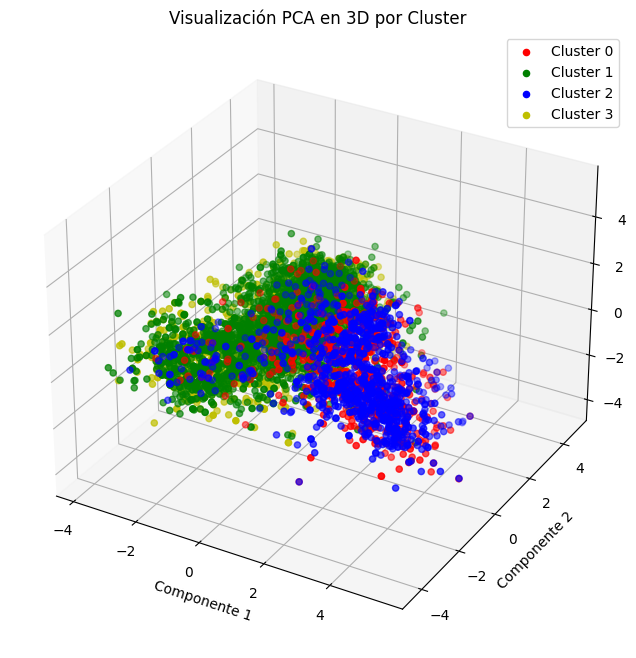

In [ ]:
# Realizar PCA con 3 componentes principales
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Crear un dataframe con los componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2', 'Componente 3'])

# Agregar la etiqueta de cluster al dataframe
data_pca_df['cluster'] = dt34['cluster']


# Visualizar los datos en 3 dimensiones por cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores para cada cluster
colors = ['r', 'g', 'b', 'y']

# Graficar los puntos en el espacio tridimensional por cluster
for cluster_id, color in zip(range(k_optimo), colors):
    cluster_data = data_pca_df[data_pca_df['cluster'] == cluster_id]
    ax.scatter(cluster_data['Componente 1'], cluster_data['Componente 2'], cluster_data['Componente 3'], c=color, label=f'Cluster {cluster_id}')

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Visualización PCA en 3D por Cluster')
ax.legend()
plt.show()

En este caso PCA no almacena sufiente información para poder ver los diferentes grupos claramente. En otras pruebas, los diferentes grupos se observaban de una forma significante, sin embargo, hemos decicido quedaros con esta clusterización debido a que no cuenta con outliers (a diferencia de las otras pruebas)

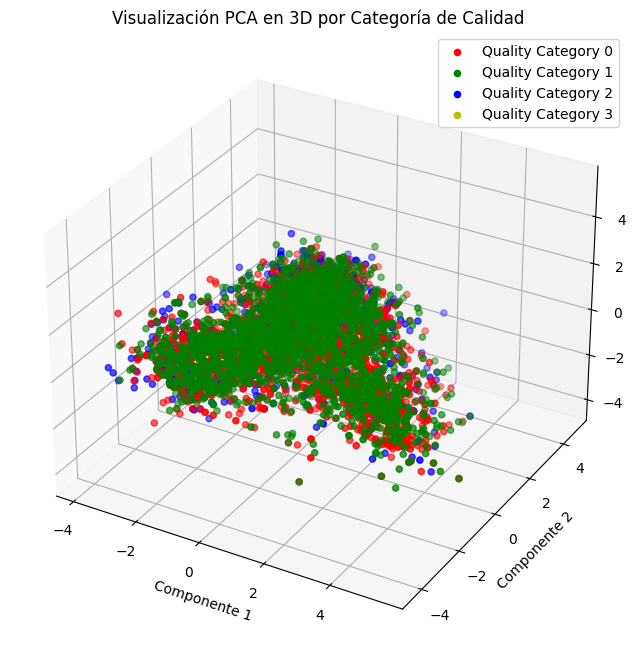

In [ ]:
# Agrupar las clases de quality en 4 categorías aproximadamente equilibradas
quality_bins = pd.qcut(dt34['quality'], q=4, labels=False, duplicates='drop')
data_pca_df['quality_category'] = quality_bins

# Asignar un color a cada categoría de calidad
quality_colors = ['r', 'g', 'b', 'y']

# Visualizar los datos en 3 dimensiones con colores basados en la categoría de calidad
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el espacio tridimensional
for quality_id, color in zip(range(4), quality_colors):
    quality_data = data_pca_df[data_pca_df['quality_category'] == quality_id]
    ax.scatter(quality_data['Componente 1'], quality_data['Componente 2'], quality_data['Componente 3'], c=color, label=f'Quality Category {quality_id}')

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Visualización PCA en 3D por Categoría de Calidad')
ax.legend()

Al comparar las dos coloraciones de los datos, se puede ver que el algoritmo de clusterización no ha agrupado los datos según la calidad. Si existe relación no se observa claramente con este método.


### 3.3.b
**¿Cómo se diferencian los clústeres entre sí? (0.5 puntos).**
Observando los datos de cada clúster, podemos ver:

##### CLÚSTER 0: VINOS EQUILIBRADOS Y MODERADOS
**Características Principales:**
- Niveles moderados de acidez volátil y ácido cítrico.
- Contenido alcohólico moderado.
- Densidad moderadamente baja y pH cercano a 3.22.

**Significado General:**
Vinos equilibrados y moderados en todos los aspectos, con una combinación armoniosa de acidez, alcohol y otros componentes.

##### CLÚSTER 1: VINOS FRESCOS Y LIGEROS
**Características Principales:**
- Acidez volátil moderada y bajo nivel de ácido cítrico.
- Contenido alcohólico moderadamente alto.
- Densidad más baja y pH cercano a 3.21.

**Significado General:**
Vinos frescos y ligeros, con una acidez refrescante y un perfil más ligero en boca.

##### CLÚSTER 2: VINOS CON ACIDEZ ELEVADA
**Características Principales:**
- Acidez volátil más alta y niveles moderados de ácido cítrico.
- Contenido alcohólico moderadamente bajo.
- Densidad alta y pH cercano a 3.37.

**Significado General:**
Vinos con una acidez más pronunciada, lo que les confiere una sensación más fresca y nítida en boca.

##### CLÚSTER 3: VINOS RICOS EN AZÚCAR Y ALCOHOL
**Características Principales:**
- Niveles más altos de ácido cítrico y alcohol.
- Densidad más alta y pH cercano a 3.16.
- Contenido moderado de acidez volátil y dióxido de azufre total.

**Significado General:**
Vinos más ricos en azúcar y alcohol, con una sensación más suave en boca y posiblemente un perfil más dulce.

# EJERCICIO 4 (agrupamiento)
La empresa productora de vinos desea mejorar el proceso de producción de sus vinos con el objetivo de mejorar las futuras producciones.

Para ello han pensado en utilizar un algoritmo de agrupamiento jerárquico para segmentar los diferentes vinos
en base a sus componentes, calidad y nivel de alcohol.

1) Dado el mejor valor de k del apartado anterior selecciona los 10 ejemplos más representativos de cada clúster para generar un nuevo dataset y aplicar agrupamiento jerárquico y responder a las siguientes preguntas:

• ¿Cuál ha sido tu criterio para seleccionar los ejemplos más representativos de cada clúster? (0,5
puntos).


2) Seleccionar un algoritmo de agrupamiento jerárquico y generar los diferentes clústeres en base a los atributos seleccionados (0.75 puntos).


3) Generar y analizar el dendrograma resultante del proceso de agrupamiento. (0,75 puntos)

## 4.1.
**Dado el mejor valor de k del apartado anterior selecciona los 10 ejemplos más representativos de cada clúster para generar un nuevo dataset y aplicar agrupamiento jerárquico y responder a las siguientes preguntas:**

Para realizar este apartado, vamos a generar otra clusterización del dataset original en el que tengamos en cuenta la variable calidad, nos quedaremos igualmente con el k = 4

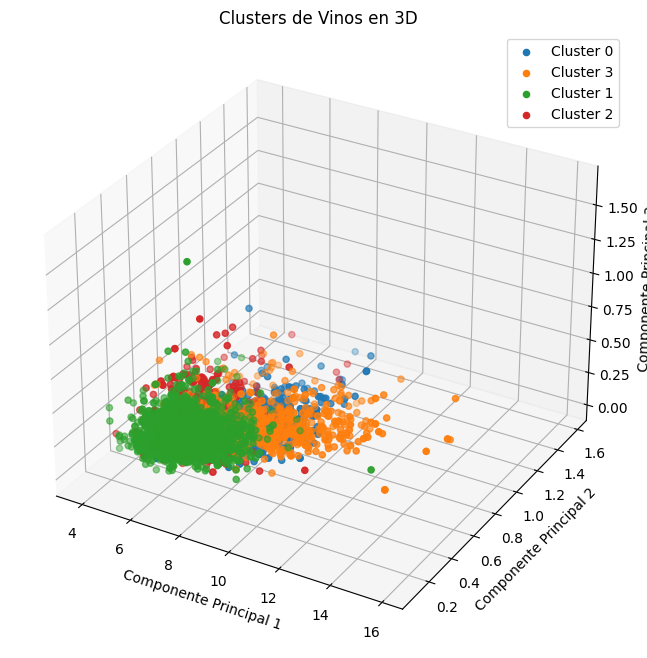

In [ ]:
  # Cargar los datos
data = pd.read_csv("wine_alcohol.csv", sep=";")
data = data.drop(columns=['id'])

# Seleccionar solo las características numéricas relevantes
X = data.iloc[:, 1:-1]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad a 3 dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Calcular los clusters usando KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)  # Aquí establecemos explícitamente n_init
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al DataFrame original
data['Cluster'] = clusters

# Visualizar los clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {cluster}')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clusters de Vinos en 3D')

plt.legend()
plt.show()



**Paso 1: Selección de Ejemplos Representativos** (0,5 punto)


Para seleccionar los 10 ejemplos más representativos de cada clúster, **utilizaremos la distancia de cada punto a su centroide**. Los puntos más cercanos a cada centroide son considerados como los más representativos de ese clúster.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))  # Scale only numeric data

# Inicializo el modelo
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

# Calculo de la matriz de distancias
dist_matrix = distance_matrix(X_scaled, kmeans.cluster_centers_)

# Selecciono los 10 puntos mas cercanos
indices = []
for i in range(n_clusters):
    dists = dist_matrix[:, i]
    ind = np.argsort(dists)[:10]
    indices.extend(ind)

# Creo una lista
representative_points = data.iloc[indices]


if 'Cluster' in representative_points.columns:
    representative_points = representative_points.drop(columns=['Cluster'])

# Imrpimo lista
print(representative_points)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        id  fixed acidity  volatile acidity  citric acid  residual sugar  \
4143  2544            6.9              0.32         0.30             1.8   
3748  2149            6.8              0.24         0.34             5.1   
4610  3011            6.6              0.22         0.36             5.5   
4713  3114            6.3              0.17         0.32             4.2   
4714  3115            6.3              0.17         0.32             4.2   
4731  3132            6.3              0.17         0.32             4.2   
4603  3004            6.3              0.18         0.36             1.2   
4453  2854            6.4              0.21         0.28             5.9   
4460  2861            6.4              0.21         0.28             5.9   
4376  2777            7.6              0.20         0.36             1.9   
1073  1073            8.0              0.62         0.33             2.7   
1283  1283            8.7              0.63         0.28             2.7   
116    116  

## 4.2, 4.3
**Paso 2: Agrupamiento Jerárquico**

Utilizaremos el método de agrupamiento jerárquico Ward, que minimiza la suma de diferencias cuadradas dentro de todos los clústers



In [ ]:
# Extraer las columnas relevantes
X = representative_points[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality','wine type']]

# Realizar clustering jerárquico
Z = linkage(X, method='ward')


# Visualizamos la matriz de enlace
print("Matriz de Enlace:")
print(Z)



Matriz de Enlace:
[[  7.           8.           0.           2.        ]
 [  3.           4.           0.           2.        ]
 [  5.          31.           0.           3.        ]
 [ 25.          26.           0.           2.        ]
 [ 28.          29.           0.           2.        ]
 [ 18.          19.           2.05717015   2.        ]
 [  6.           9.           2.50764504   2.        ]
 [ 21.          34.           3.4692172    3.        ]
 [  1.          30.           3.55082741   3.        ]
 [  2.          38.           5.77091164   4.        ]
 [ 10.          12.           5.93601898   2.        ]
 [ 22.          23.           5.99674091   2.        ]
 [ 24.          27.           6.14982901   2.        ]
 [ 16.          35.           7.4989249    3.        ]
 [  0.          36.           7.75545034   3.        ]
 [ 14.          17.           9.22515587   2.        ]
 [ 15.          40.           9.29357214   3.        ]
 [ 20.          42.          13.38337546   3.  

En la primera fila, los clusters con índices 8 y 7 se combinan con un incremento en la suma de cuadrados de 0.0, formando un nuevo cluster con 2 elementos.
La última fila muestra la fusión de los clusters 52 y 57, con una gran distancia de enlace de 361.987, indicando posiblemente una fusión de dos grupos bastante distintos o dispersos, con un total de 30 elementos en el nuevo cluster formado.

**Paso 3 : Analisis dendograma**

Viendo el dendograma, lo que tendría mayor sentido sería escoger 2 clústers, ya que estos son los que se encuentran más diferenciados.

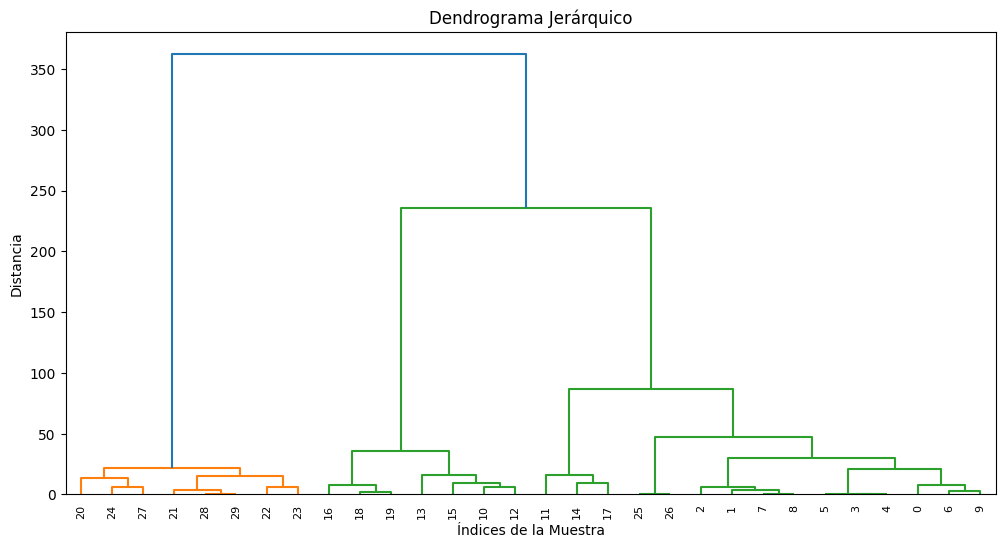

In [ ]:
# Mostrar dendrograma
plt.figure(figsize=(12, 6))
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índices de la Muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()


Estructura del dendograna:

Cada hoja (representada por una etiqueta en el eje X) representa uno de los ejemplos más representativos de los clusters iniciales. La altura en la que se unen las hojas o grupos de hojas indica la distancia o disimilitud entre esos grupos. Cuanto más alta sea la unión, mayor es la disimilitud.

Colores:

Los colores hacen referencia a los distintos clusters. Los colores en el dendrograma (azul, naranja, verde) suelen diferenciar los diferentes clusters formados a un nivel de corte específico en la altura del dendrograma.

Análisis de los clusters:

**Cluster naranja y verde** : Estos dos clusters representan grupos de vinos más similares entre sí pero significativamente diferentes del cluster azul. Dentro de estos dos, el cluster verde representa ejemplos más similares entre sí comparado con el cluster naranja, como se puede observar por la altura más baja a la que se unen.

**Cluster azul** : Este cluster se caracteriza por estar bastante separado del resto, indicando una gran diferencia en términos de las características de los vinos en este grupo comparado con los otros.

